In [ ]:
dataset_path = '/content/drive/MyDrive/Urbansound8k'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install librosa

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
!dir

gdrive	sample_data


In [ ]:
filename='/content/gdrive/MyDrive/Urbansound8k/Audio/fold2/18581-3-0-5.wav'

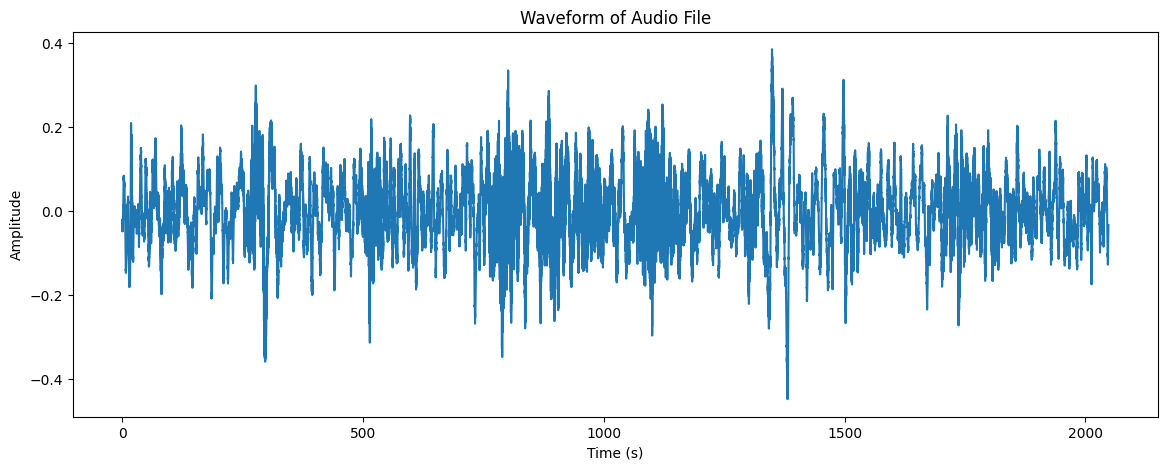

In [ ]:
#dog sound
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
filename = '/content/gdrive/MyDrive/Urbansound8k/Audio/fold2/18581-3-0-5.wav'
data, sample_rate = librosa.load(filename)

duration = len(data) / sample_rate

time = librosa.frames_to_time(range(len(data)), sr=sample_rate)

plt.figure(figsize=(14, 5))
plt.plot(time, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Audio File')
plt.show()

Audio(data, rate=sample_rate)

In [ ]:
#sample rate-defines how many times per second a sound is sampled.standard sample rate used for audio is 44.1 kilohertz
sample_rate

22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)


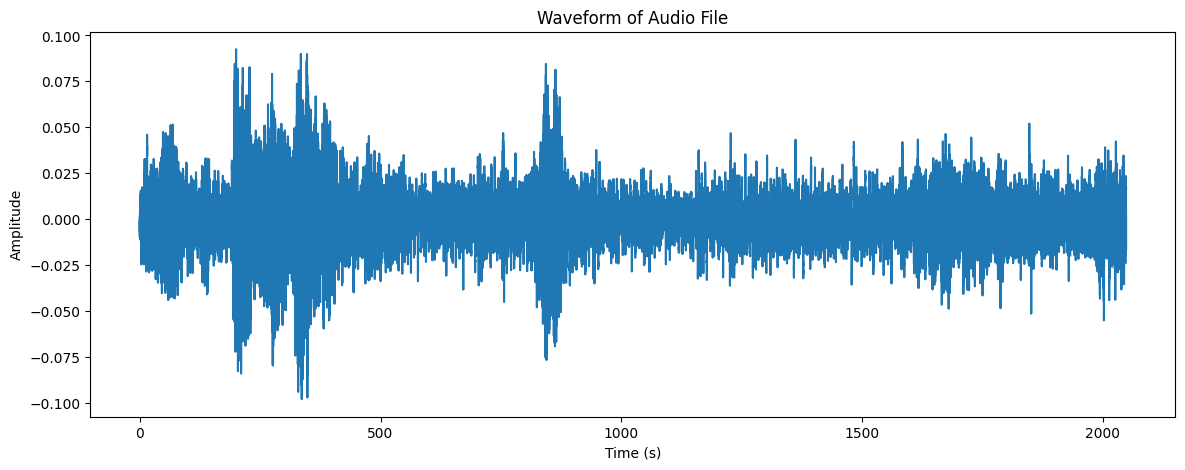

In [ ]:
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

filename = '/content/gdrive/MyDrive/Urbansound8k/Audio/fold10/26255-3-13-1.wav'
data, sample_rate = librosa.load(filename)

duration = len(data) / sample_rate

time = librosa.frames_to_time(range(len(data)), sr=sample_rate)

plt.figure(figsize=(14, 5))
plt.plot(time, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Audio File')
plt.show()

Audio(data, rate=sample_rate)

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

wave_audio


array([[   8,  -91],
       [ -23, -130],
       [ -64, -150],
       ...,
       [ 534,   12],
       [ 775,  236],
       [ 857,  393]], dtype=int16)

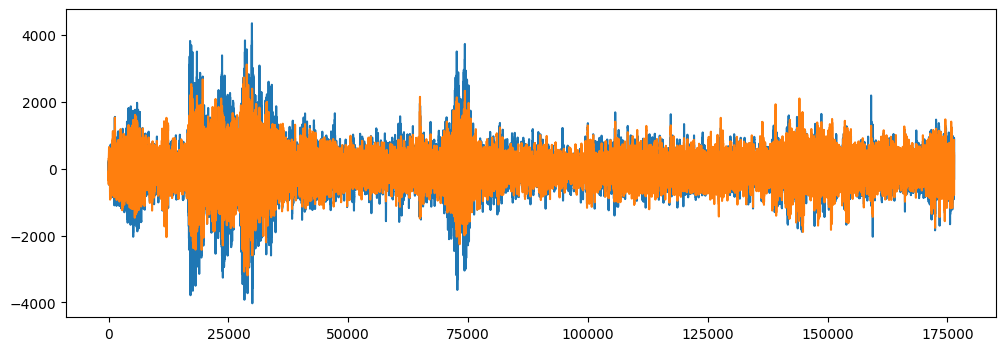

In [ ]:
#original audio with 2 channels--(2 channels: stereo,1 channel is mono)
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [ ]:
import pandas as pd
metadata=pd.read_csv('/content/gdrive/MyDrive/Urbansound8k/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
import librosa

# Load the audio file using Librosa
filename = '/content/gdrive/MyDrive/Urbansound8k/Audio/fold10/26255-3-13-1.wav'
audio_data, sample_rate = librosa.load(filename)

# Calculate MFCCs from the loaded audio data
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)

# Display the shape of the MFCC matrix
print(mfccs.shape)


(40, 173)


In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/gdrive/MyDrive/Urbansound8k/Audio'
metadata=pd.read_csv('/content/gdrive/MyDrive/Urbansound8k/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
!pip install resampy
!pip install --force-reinstall resampy


  Using cached resampy-0.4.2-py3-none-any.whl (3.1 MB)
  Using cached numpy-1.26.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached numba-0.58.1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.6 MB)
  Using cached llvmlite-0.41.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1
  Attempting uninstall: resampy
    Found existing installation: resampy 0.4.2
    Uninstalling resampy-0.4.2:
      Successfully uninstalled resampy-0.4.2
ERROR: pip's dependency resolve

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [25:38,  2.34it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [58:53,  2.40it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [58:53,  2.99it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [1:01:44,  2.36it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
input_shape = (X_train.shape[0],X_train.shape[1])
input_shape

(6985, 40)

In [ ]:
input_shape

(6985, 40)

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Reshape the input data for SimpleRNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the RNN model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 150
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train_reshaped, y_train, batch_size=num_batch_size, epochs=num_epochs,
          validation_data=(X_test_reshaped, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/150
217/219 [============================>.] - ETA: 0s - loss: 2.0035 - accuracy: 0.2751
Epoch 1: val_loss improved from inf to 1.81296, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 6s 19ms/step - loss: 2.0033 - accuracy: 0.2754 - val_loss: 1.8130 - val_accuracy: 0.3583
Epoch 2/150
  3/219 [..............................] - ETA: 6s - loss: 1.9568 - accuracy: 0.2500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/219 [============================>.] - ETA: 0s - loss: 1.7028 - accuracy: 0.3953
Epoch 2: val_loss improved from 1.81296 to 1.60477, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 6s 29ms/step - loss: 1.7022 - accuracy: 0.3954 - val_loss: 1.6048 - val_accuracy: 0.4442
Epoch 3/150
218/219 [============================>.] - ETA: 0s - loss: 1.5725 - accuracy: 0.4425
Epoch 3: val_loss improved from 1.60477 to 1.55782, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 4s 17ms/step - loss: 1.5730 - accuracy: 0.4425 - val_loss: 1.5578 - val_accuracy: 0.4705
Epoch 4/150
219/219 [==============================] - ETA: 0s - loss: 1.4734 - accuracy: 0.4829
Epoch 4: val_loss improved from 1.55782 to 1.44566, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 4s 17ms/step - loss: 1.4734 - accuracy: 0.4829 - val_loss: 1.4457 - val_accuracy: 0.5037
Epoc

Epoch 1/150
219/219 [==============================] - ETA: 0s - loss: 0.2850 - accuracy: 0.9015
Epoch 1: val_loss improved from inf to 2.10836, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 5s 24ms/step - loss: 0.2850 - accuracy: 0.9015 - val_loss: 2.1084 - val_accuracy: 0.6428
Epoch 2/150
216/219 [============================>.] - ETA: 0s - loss: 0.2697 - accuracy: 0.9052
Epoch 2: val_loss improved from 2.10836 to 2.09033, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 5s 23ms/step - loss: 0.2700 - accuracy: 0.9049 - val_loss: 2.0903 - val_accuracy: 0.6428
Epoch 3/150
219/219 [==============================] - ETA: 0s - loss: 0.2244 - accuracy: 0.9225
Epoch 3: val_loss did not improve from 2.09033
219/219 [==============================] - 4s 17ms/step - loss: 0.2244 - accuracy: 0.9225 - val_loss: 2.1951 - val_accuracy: 0.6445
Epoch 4/150
219/219 [==============================] - E

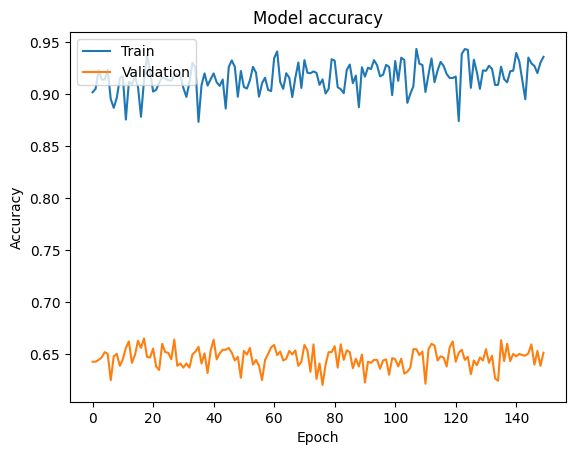

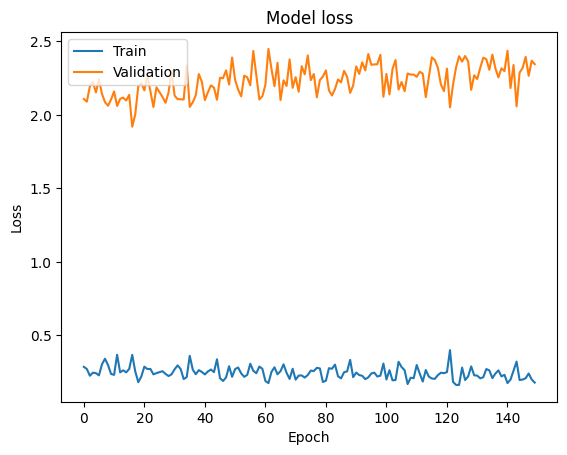

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'model' is already trained
num_epochs = 150  # Update with the actual number of epochs
num_batch_size = 32  # Update with the actual batch size

# Train the model and capture the training history
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train_reshaped, y_train, batch_size=num_batch_size, epochs=num_epochs,
                    validation_data=(X_test_reshaped, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
